In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # regresion logistica
from sklearn.metrics import classification_report  # metricas para evaluar el modelo
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split  #dividir la data en test y prueba
from sklearn.linear_model import LinearRegression   #implementar el algoritmo de Machine Learning
from sklearn.preprocessing import minmax_scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# 1. Obtencion de Datos

In [2]:
#lectura del archivo excel
cliente = pd.read_excel("CLIENTES.xlsx")

In [3]:
cliente.head()

,CODIGO_CLIENTE,CODIGO_CLIENTE_EMPRESA,NOMBRE_CLIENTE,IDENTIFICACION_FISCAL,TELEFONO,TELEFONO_2,CODIGO_CUENTA_CONTABLE_CLIENTE,CIUDAD,INACTIVO,BALANCE,ZONA,CIUDAD_PRINCIPAL,PAIS,MEMO_CLIENTE,SALESMAN,PRICE_CODE,CLIENT_TYPE,ENTRY_DATE,EMAIL_FISCAL
0,CL000001,CL000001-MIRAF,LABORATORIO GENESIS,1890152623001,2840123,2841549,1.120010e+10,NaN,1,0.0,UIO,QUITO,ECUADOR,NaN,VEN01,NaN,INS,00:00:00,mdjadan@labogenesis.com
1,CL000002,CL000002-MIRAF,LUZ MARIA ROMERO ESPIN,1800965368,0992388524,NaN,1.120010e+10,NaN,0,0.0,UIO,QUITO,ECUADOR,NaN,VEN01,NaN,INS,00:00:00,NaN
2,CL000003,CL000003-MIRAF,MARCO ANTONIO GUAMAN GUEVARA,1802315828001,2824750,NaN,1.120010e+10,NaN,1,0.0,UIO,QUITO,ECUADOR,NaN,VEN01,NaN,COB,00:00:00,NaN
3,CL000004,CL000004-MIRAF,ANGEL RODRIGO MAYORGA MAYORGA,1800633271001,2854722,995530994,1.120010e+10,NaN,1,0.0,UIO,QUITO,ECUADOR,NaN,VEN01,NaN,COB,00:00:00,NaN
4,CL000005,CL000005-MIRAF,FELIZA HORTENCIA VELASTEGUI PE,1801522408001,2841317,997410817,1.120010e+10,NaN,1,0.0,UIO,QUITO,ECUADOR,NaN,VEN01,NaN,COB,00:00:00,NaN


In [4]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5486 entries, 0 to 5485
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CODIGO_CLIENTE                  5486 non-null   object 
 1   CODIGO_CLIENTE_EMPRESA          5486 non-null   object 
 2   NOMBRE_CLIENTE                  5486 non-null   object 
 3   IDENTIFICACION_FISCAL           5482 non-null   object 
 4   TELEFONO                        4789 non-null   object 
 5   TELEFONO_2                      1350 non-null   object 
 6   CODIGO_CUENTA_CONTABLE_CLIENTE  5482 non-null   float64
 7   CIUDAD                          0 non-null      float64
 8   INACTIVO                        5486 non-null   int64  
 9   BALANCE                         5486 non-null   float64
 10  ZONA                            5486 non-null   object 
 11  CIUDAD_PRINCIPAL                5486 non-null   object 
 12  PAIS                            52

In [5]:
cliente.describe()

,CODIGO_CUENTA_CONTABLE_CLIENTE,CIUDAD,INACTIVO,BALANCE,PRICE_CODE
count,5.482000e+03,0.0,5486.000000,5486.000000,3.0
mean,1.120793e+10,NaN,0.271600,214.204048,0.0
std,9.246646e+07,NaN,0.444825,2358.571025,0.0
min,1.120010e+10,NaN,0.000000,-20625.000000,0.0
25%,1.120010e+10,NaN,0.000000,0.000000,0.0
50%,1.120010e+10,NaN,0.000000,0.000000,0.0
75%,1.120010e+10,NaN,1.000000,0.000000,0.0
max,1.230020e+10,NaN,1.000000,95470.250000,0.0


In [6]:
cliente.isnull().sum()

CODIGO_CLIENTE                       0
CODIGO_CLIENTE_EMPRESA               0
NOMBRE_CLIENTE                       0
IDENTIFICACION_FISCAL                4
TELEFONO                           697
TELEFONO_2                        4136
CODIGO_CUENTA_CONTABLE_CLIENTE       4
CIUDAD                            5486
INACTIVO                             0
BALANCE                              0
ZONA                                 0
CIUDAD_PRINCIPAL                     0
PAIS                               205
MEMO_CLIENTE                      5335
SALESMAN                             0
PRICE_CODE                        5483
CLIENT_TYPE                          0
ENTRY_DATE                           0
EMAIL_FISCAL                      3209
dtype: int64

In [7]:
factura = pd.read_excel("FACTURAS.xlsx")

In [8]:
factura.head()

,NUMERO_FACTURA,CODIGO_CLIENTE,MEMO_ANULACION,MEMO_FACTURA,FECHA_VENCIMIENTO,FACTURA_IMPRESA,DESCUENTO1,DESCUENTO_VENTA,CODIGO_DOCUMENTO,CODIGO_CLIENTE_EMPRESA,FECHA_FACTURA,VALOR_FACTURA,DESCUENTO_VENTA2,VALOR_TOTAL_PAGADO,VALOR_TOTAL_DESCUENTO,VALOR_TOTAL_SALDO_A_COBRAR,CONFIRMADO,ANULADA
0,1001000065410,CL003626,NaN,30. dias,2021-08-24 00:00:00,1,0,0.0,FACT,CL003626-MIRAF,2021-07-25,1909.2,0.0,1909.2,0.0,0.0,1,0
1,1001000065815,CL004302,NaN,CREDITO 15 DIAS,2021-08-26 00:00:00,1,0,0.0,FACT,CL004302-MIRAF,2021-08-11,98.5,0.0,98.5,0.0,0.0,1,0
2,1001000067331,CL004566,NaN,CONTADO CANCELARA A LA VENDEDORA CLIENTE RETIR...,2021-09-30 00:00:00,1,0,0.0,FACT,CL004566-MIRAF,2021-09-29,36.0,0.0,0.0,36.0,0.0,1,0
3,-105735,CL004798,NaN,NaN,2021-11-10 00:00:00,0,0,0.0,FACT,CL004798-MIRAF,2021-10-11,0.0,0.0,0.0,0.0,0.0,0,1
4,1001000014156,CL002876,NaN,EMAIL 13/10/2021,2021-12-07 00:00:00,1,0,0.0,REM,CL002876-MIRAF,2021-10-18,60.4,0.0,0.0,0.0,60.4,1,0


In [9]:
factura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29257 entries, 0 to 29256
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   NUMERO_FACTURA              29257 non-null  int64         
 1   CODIGO_CLIENTE              29257 non-null  object        
 2   MEMO_ANULACION              787 non-null    object        
 3   MEMO_FACTURA                29027 non-null  object        
 4   FECHA_VENCIMIENTO           29257 non-null  object        
 5   FACTURA_IMPRESA             29257 non-null  int64         
 6   DESCUENTO1                  29257 non-null  int64         
 7   DESCUENTO_VENTA             29257 non-null  float64       
 8   CODIGO_DOCUMENTO            29257 non-null  object        
 9   CODIGO_CLIENTE_EMPRESA      29257 non-null  object        
 10  FECHA_FACTURA               29257 non-null  datetime64[ns]
 11  VALOR_FACTURA               29257 non-null  float64   

In [10]:
factura.describe()

,NUMERO_FACTURA,FACTURA_IMPRESA,DESCUENTO1,DESCUENTO_VENTA,VALOR_FACTURA,DESCUENTO_VENTA2,VALOR_TOTAL_PAGADO,VALOR_TOTAL_DESCUENTO,VALOR_TOTAL_SALDO_A_COBRAR,CONFIRMADO,ANULADA
count,2.925700e+04,29257.000000,29257.0,29257.000000,29257.000000,29257.000000,29257.000000,29257.000000,29257.000000,29257.000000,29257.000000
mean,9.711996e+11,0.951123,0.0,0.674232,1549.671814,0.674232,1183.768723,-17.603067,350.481578,0.951225,0.050996
std,1.701269e+11,0.215615,0.0,7.022986,4866.507745,7.022986,3535.314576,780.660632,3557.722382,0.215400,0.219994
min,-1.248910e+05,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-27872.790000,-1.400000,0.000000,0.000000
25%,1.001000e+12,1.000000,0.0,0.000000,107.000000,0.000000,46.000000,0.000000,0.000000,1.000000,0.000000
50%,1.001000e+12,1.000000,0.0,0.000000,420.000000,0.000000,330.760000,0.000000,0.000000,1.000000,0.000000
75%,1.001000e+12,1.000000,0.0,0.000000,1104.600000,0.000000,870.710000,0.000000,0.000000,1.000000,0.000000
max,1.001000e+12,1.000000,0.0,245.460000,459375.000000,245.460000,173250.000000,25672.720000,459375.000000,1.000000,1.000000


In [11]:
factura.isnull().sum()

NUMERO_FACTURA                    0
CODIGO_CLIENTE                    0
MEMO_ANULACION                28470
MEMO_FACTURA                    230
FECHA_VENCIMIENTO                 0
FACTURA_IMPRESA                   0
DESCUENTO1                        0
DESCUENTO_VENTA                   0
CODIGO_DOCUMENTO                  0
CODIGO_CLIENTE_EMPRESA            0
FECHA_FACTURA                     0
VALOR_FACTURA                     0
DESCUENTO_VENTA2                  0
VALOR_TOTAL_PAGADO                0
VALOR_TOTAL_DESCUENTO             0
VALOR_TOTAL_SALDO_A_COBRAR        0
CONFIRMADO                        0
ANULADA                           0
dtype: int64

In [12]:
producto = pd.read_excel("PRODUCTOS.xlsx")

In [13]:
producto.head()

,DOC_ID_CORP,TRANS_DATE,PRODUCT_NAME,PRODUCT_ID,QUANTITY,UNIT_COST,LINE_TOTAL,TAX TOTAL,DISCOUNT_AMOUNT,NET_LINE_TOTAL,NUMERO_FACTURA
0,NaN,2022,SEMITA 45 KG,PT-SUBPRODUCTO-00004,1,20.50,20.50,0.00,0.0,20.50,1001000084198
1,NaN,2022,HARINA TRADICION INTEGR 25 KG,PT-HARINA-00016,1,25.00,25.00,0.00,0.0,25.00,1001000084198
2,NaN,2022,LEVADURA SAF INSTANT ORO 500GR,BNPS-LEVADURA-00001,20,3.21,64.20,7.70,0.0,64.20,1001000084199
3,NaN,2022,MANTECA PANIF.BLOQ. 50KG T/S,BNPS-MANTECA-00007,2,114.85,229.70,0.00,0.0,229.70,1001000084199
4,NaN,2022,ESENCIA GL.3900MLVAIN NEGR EST,BNPS-ESENCIA-0031,1,14.45,14.45,1.74,0.0,14.45,1001000084199


In [14]:
producto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10434 entries, 0 to 10433
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DOC_ID_CORP      0 non-null      float64
 1   TRANS_DATE       10434 non-null  int64  
 2   PRODUCT_NAME     10434 non-null  object 
 3   PRODUCT_ID       10434 non-null  object 
 4   QUANTITY         10434 non-null  int64  
 5   UNIT_COST        10434 non-null  float64
 6   LINE_TOTAL       10434 non-null  float64
 7   TAX TOTAL        10434 non-null  float64
 8   DISCOUNT_AMOUNT  10434 non-null  float64
 9   NET_LINE_TOTAL   10434 non-null  float64
 10  NUMERO_FACTURA   10434 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 896.8+ KB


In [15]:
producto.describe()

,DOC_ID_CORP,TRANS_DATE,QUANTITY,UNIT_COST,LINE_TOTAL,TAX TOTAL,DISCOUNT_AMOUNT,NET_LINE_TOTAL,NUMERO_FACTURA
count,0.0,10434.000000,10434.000000,10434.000000,10434.000000,10434.000000,10434.000000,10434.000000,1.043400e+04
mean,NaN,2021.992237,25.209412,36.352053,793.220866,0.156568,0.002159,793.218707,1.001000e+12
std,NaN,0.789219,255.439809,36.712880,5205.305021,1.729818,0.100196,5205.305187,1.525152e+03
min,NaN,2021.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001000e+12
25%,NaN,2021.000000,1.000000,9.150000,33.000000,0.000000,0.000000,33.000000,1.001000e+12
50%,NaN,2022.000000,5.000000,42.000000,126.000000,0.000000,0.000000,126.000000,1.001000e+12
75%,NaN,2023.000000,15.000000,45.000000,451.000000,0.000000,0.000000,451.000000,1.001000e+12
max,NaN,2023.000000,25000.000000,1875.000000,459375.000000,52.580000,8.110000,459375.000000,1.001000e+12


In [16]:
producto.isnull().sum()

DOC_ID_CORP        10434
TRANS_DATE             0
PRODUCT_NAME           0
PRODUCT_ID             0
QUANTITY               0
UNIT_COST              0
LINE_TOTAL             0
TAX TOTAL              0
DISCOUNT_AMOUNT        0
NET_LINE_TOTAL         0
NUMERO_FACTURA         0
dtype: int64

# 2. Limpieza de Datos

In [17]:
result = pd.merge(producto, factura, how="outer")
result.head(5)

,DOC_ID_CORP,TRANS_DATE,PRODUCT_NAME,PRODUCT_ID,QUANTITY,UNIT_COST,LINE_TOTAL,TAX TOTAL,DISCOUNT_AMOUNT,NET_LINE_TOTAL,...,CODIGO_DOCUMENTO,CODIGO_CLIENTE_EMPRESA,FECHA_FACTURA,VALOR_FACTURA,DESCUENTO_VENTA2,VALOR_TOTAL_PAGADO,VALOR_TOTAL_DESCUENTO,VALOR_TOTAL_SALDO_A_COBRAR,CONFIRMADO,ANULADA
0,NaN,2022.0,SEMITA 45 KG,PT-SUBPRODUCTO-00004,1.0,20.50,20.5,0.0,0.0,20.5,...,FACT,CL001256-MIRAF,2023-04-13,1406.9,0.0,906.9,0.0,500.0,1.0,0.0
1,NaN,2022.0,HARINA TRADICION INTEGR 25 KG,PT-HARINA-00016,1.0,25.00,25.0,0.0,0.0,25.0,...,FACT,CL001256-MIRAF,2023-04-13,1406.9,0.0,906.9,0.0,500.0,1.0,0.0
2,NaN,2022.0,HARINA TRADICION PREMIUM 50 KG,PT-HARINA-00006,20.0,45.10,902.0,0.0,0.0,902.0,...,FACT,CL001256-MIRAF,2023-04-13,1406.9,0.0,906.9,0.0,500.0,1.0,0.0
3,NaN,2022.0,HARINA TRADICION PREMIUM 50 KG,PT-HARINA-00006,2.0,0.00,0.0,0.0,0.0,0.0,...,FACT,CL001256-MIRAF,2023-04-13,1406.9,0.0,906.9,0.0,500.0,1.0,0.0
4,NaN,2022.0,MANTECA PANIF.BLOQ. 50KG T/S,BNPS-MANTECA-00007,4.0,114.85,459.4,0.0,0.0,459.4,...,FACT,CL001256-MIRAF,2023-04-13,1406.9,0.0,906.9,0.0,500.0,1.0,0.0


In [18]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34429 entries, 0 to 34428
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DOC_ID_CORP                 0 non-null      float64       
 1   TRANS_DATE                  10434 non-null  float64       
 2   PRODUCT_NAME                10434 non-null  object        
 3   PRODUCT_ID                  10434 non-null  object        
 4   QUANTITY                    10434 non-null  float64       
 5   UNIT_COST                   10434 non-null  float64       
 6   LINE_TOTAL                  10434 non-null  float64       
 7   TAX TOTAL                   10434 non-null  float64       
 8   DISCOUNT_AMOUNT             10434 non-null  float64       
 9   NET_LINE_TOTAL              10434 non-null  float64       
 10  NUMERO_FACTURA              34429 non-null  int64         
 11  CODIGO_CLIENTE              34428 non-null  object    

In [19]:
# borrar columna innecesarias
result.drop("CODIGO_CLIENTE_EMPRESA", axis=1, inplace=True)
result.drop("MEMO_ANULACION", axis=1, inplace=True)
result.drop("MEMO_FACTURA", axis=1, inplace=True)
result.drop("FECHA_VENCIMIENTO", axis=1, inplace=True)
result.drop("FACTURA_IMPRESA", axis=1, inplace=True)
result.drop("DESCUENTO1", axis=1, inplace=True)
result.drop("DESCUENTO_VENTA", axis=1, inplace=True)
result.drop("CODIGO_DOCUMENTO", axis=1, inplace=True)
result.drop("FECHA_FACTURA", axis=1, inplace=True)
result.drop("VALOR_FACTURA", axis=1, inplace=True)
result.drop("DESCUENTO_VENTA2", axis=1, inplace=True)
result.drop("VALOR_TOTAL_PAGADO", axis=1, inplace=True)
result.drop("VALOR_TOTAL_SALDO_A_COBRAR", axis=1, inplace=True)
result.drop("VALOR_TOTAL_DESCUENTO", axis=1, inplace=True)
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34429 entries, 0 to 34428
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DOC_ID_CORP      0 non-null      float64
 1   TRANS_DATE       10434 non-null  float64
 2   PRODUCT_NAME     10434 non-null  object 
 3   PRODUCT_ID       10434 non-null  object 
 4   QUANTITY         10434 non-null  float64
 5   UNIT_COST        10434 non-null  float64
 6   LINE_TOTAL       10434 non-null  float64
 7   TAX TOTAL        10434 non-null  float64
 8   DISCOUNT_AMOUNT  10434 non-null  float64
 9   NET_LINE_TOTAL   10434 non-null  float64
 10  NUMERO_FACTURA   34429 non-null  int64  
 11  CODIGO_CLIENTE   34428 non-null  object 
 12  CONFIRMADO       34428 non-null  float64
 13  ANULADA          34428 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 3.9+ MB


In [20]:
resultado = pd.merge(result, cliente, how="outer")
resultado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37731 entries, 0 to 37730
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DOC_ID_CORP                     0 non-null      float64
 1   TRANS_DATE                      10436 non-null  float64
 2   PRODUCT_NAME                    10436 non-null  object 
 3   PRODUCT_ID                      10436 non-null  object 
 4   QUANTITY                        10436 non-null  float64
 5   UNIT_COST                       10436 non-null  float64
 6   LINE_TOTAL                      10436 non-null  float64
 7   TAX TOTAL                       10436 non-null  float64
 8   DISCOUNT_AMOUNT                 10436 non-null  float64
 9   NET_LINE_TOTAL                  10436 non-null  float64
 10  NUMERO_FACTURA                  34431 non-null  float64
 11  CODIGO_CLIENTE                  37730 non-null  object 
 12  CONFIRMADO                      

In [21]:
# borrar columna innecesarias
resultado.drop("EMAIL_FISCAL", axis=1, inplace=True)
resultado.drop("ENTRY_DATE", axis=1, inplace=True)
resultado.drop("PRICE_CODE", axis=1, inplace=True)
resultado.drop("MEMO_CLIENTE", axis=1, inplace=True)
resultado.drop("PAIS", axis=1, inplace=True)
resultado.drop("BALANCE", axis=1, inplace=True)
resultado.drop("CIUDAD", axis=1, inplace=True)
resultado.drop("CODIGO_CUENTA_CONTABLE_CLIENTE", axis=1, inplace=True)
resultado.drop("TELEFONO_2", axis=1, inplace=True)
resultado.drop("TELEFONO", axis=1, inplace=True)
resultado.drop("IDENTIFICACION_FISCAL", axis=1, inplace=True)
resultado.drop("NOMBRE_CLIENTE", axis=1, inplace=True)
resultado.drop("CODIGO_CLIENTE_EMPRESA", axis=1, inplace=True)
resultado.drop("DOC_ID_CORP", axis=1, inplace=True)
resultado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37731 entries, 0 to 37730
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TRANS_DATE        10436 non-null  float64
 1   PRODUCT_NAME      10436 non-null  object 
 2   PRODUCT_ID        10436 non-null  object 
 3   QUANTITY          10436 non-null  float64
 4   UNIT_COST         10436 non-null  float64
 5   LINE_TOTAL        10436 non-null  float64
 6   TAX TOTAL         10436 non-null  float64
 7   DISCOUNT_AMOUNT   10436 non-null  float64
 8   NET_LINE_TOTAL    10436 non-null  float64
 9   NUMERO_FACTURA    34431 non-null  float64
 10  CODIGO_CLIENTE    37730 non-null  object 
 11  CONFIRMADO        34430 non-null  float64
 12  ANULADA           34430 non-null  float64
 13  INACTIVO          37730 non-null  float64
 14  ZONA              37730 non-null  object 
 15  CIUDAD_PRINCIPAL  37730 non-null  object 
 16  SALESMAN          37730 non-null  object

In [22]:
resultado.isnull().sum()

TRANS_DATE          27295
PRODUCT_NAME        27295
PRODUCT_ID          27295
QUANTITY            27295
UNIT_COST           27295
LINE_TOTAL          27295
TAX TOTAL           27295
DISCOUNT_AMOUNT     27295
NET_LINE_TOTAL      27295
NUMERO_FACTURA       3300
CODIGO_CLIENTE          1
CONFIRMADO           3301
ANULADA              3301
INACTIVO                1
ZONA                    1
CIUDAD_PRINCIPAL        1
SALESMAN                1
CLIENT_TYPE             1
dtype: int64

<Axes: >

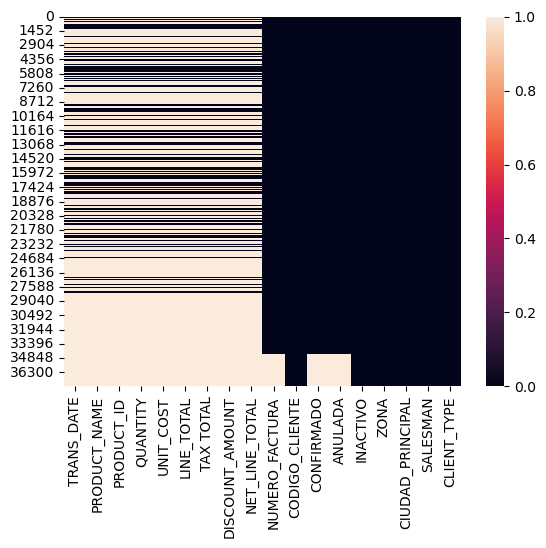

In [23]:
sns.heatmap(resultado.isna())

In [24]:
# clase 1 = 39; clase 2 = 30; clase 3 = 27;
def calcular_media_edad(columnas): # columnas Age y Pclass
    edad = columnas[0]
    clase = columnas[1]
    if pd.isnull(edad):
        if clase == 0:
            return 1
        elif clase == 1:
            return 0
        elif clase == 'NaN':
            return 0
    else:
        return edad

# invocar la funcion calcular_media_edad
resultado["CONFIRMADO"] = resultado[["CONFIRMADO","ANULADA"]].apply(calcular_media_edad, axis=1)

In [25]:
resultado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37731 entries, 0 to 37730
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TRANS_DATE        10436 non-null  float64
 1   PRODUCT_NAME      10436 non-null  object 
 2   PRODUCT_ID        10436 non-null  object 
 3   QUANTITY          10436 non-null  float64
 4   UNIT_COST         10436 non-null  float64
 5   LINE_TOTAL        10436 non-null  float64
 6   TAX TOTAL         10436 non-null  float64
 7   DISCOUNT_AMOUNT   10436 non-null  float64
 8   NET_LINE_TOTAL    10436 non-null  float64
 9   NUMERO_FACTURA    34431 non-null  float64
 10  CODIGO_CLIENTE    37730 non-null  object 
 11  CONFIRMADO        34430 non-null  float64
 12  ANULADA           34430 non-null  float64
 13  INACTIVO          37730 non-null  float64
 14  ZONA              37730 non-null  object 
 15  CIUDAD_PRINCIPAL  37730 non-null  object 
 16  SALESMAN          37730 non-null  object

In [26]:
#resultado.to_excel("verificamos.xlsx") 

In [27]:
eliminarNulos = resultado.dropna() 
eliminarNulos.isnull().sum()
eliminarNulos

,TRANS_DATE,PRODUCT_NAME,PRODUCT_ID,QUANTITY,UNIT_COST,LINE_TOTAL,TAX TOTAL,DISCOUNT_AMOUNT,NET_LINE_TOTAL,NUMERO_FACTURA,CODIGO_CLIENTE,CONFIRMADO,ANULADA,INACTIVO,ZONA,CIUDAD_PRINCIPAL,SALESMAN,CLIENT_TYPE
0,2022.0,SEMITA 45 KG,PT-SUBPRODUCTO-00004,1.0,20.50,20.5,0.0,0.0,20.5,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,CUENCA,VEN03,COB
1,2022.0,HARINA TRADICION INTEGR 25 KG,PT-HARINA-00016,1.0,25.00,25.0,0.0,0.0,25.0,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,CUENCA,VEN03,COB
2,2022.0,HARINA TRADICION PREMIUM 50 KG,PT-HARINA-00006,20.0,45.10,902.0,0.0,0.0,902.0,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,CUENCA,VEN03,COB
3,2022.0,HARINA TRADICION PREMIUM 50 KG,PT-HARINA-00006,2.0,0.00,0.0,0.0,0.0,0.0,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,CUENCA,VEN03,COB
4,2022.0,MANTECA PANIF.BLOQ. 50KG T/S,BNPS-MANTECA-00007,4.0,114.85,459.4,0.0,0.0,459.4,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,CUENCA,VEN03,COB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28333,2022.0,SEMITA 45 KG,PT-SUBPRODUCTO-00004,2.0,20.50,41.0,0.0,0.0,41.0,1.001000e+12,CL002710,1.0,0.0,0.0,UIO,QUITO,VEN01,INS
28341,2022.0,HARINA TRADICION PLUS 50 KG.,PT-HARINA-00009,1.0,44.50,44.5,0.0,0.0,44.5,1.001000e+12,CL005591,1.0,0.0,0.0,UIO,QUITO,VEN01,INS
28342,2022.0,SEMITA 45 KG,PT-SUBPRODUCTO-00004,35.0,21.00,735.0,0.0,0.0,735.0,1.001000e+12,CL000467,1.0,0.0,0.0,UIO,QUITO,VEN01,COB
28344,2022.0,HARINA TRADICION PREMIUM 50 KG,PT-HARINA-00006,100.0,45.10,4510.0,0.0,0.0,4510.0,1.001000e+12,CL005241,1.0,0.0,0.0,UIO,QUITO,VEN01,COB


In [28]:
eliminarNulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10435 entries, 0 to 28345
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TRANS_DATE        10435 non-null  float64
 1   PRODUCT_NAME      10435 non-null  object 
 2   PRODUCT_ID        10435 non-null  object 
 3   QUANTITY          10435 non-null  float64
 4   UNIT_COST         10435 non-null  float64
 5   LINE_TOTAL        10435 non-null  float64
 6   TAX TOTAL         10435 non-null  float64
 7   DISCOUNT_AMOUNT   10435 non-null  float64
 8   NET_LINE_TOTAL    10435 non-null  float64
 9   NUMERO_FACTURA    10435 non-null  float64
 10  CODIGO_CLIENTE    10435 non-null  object 
 11  CONFIRMADO        10435 non-null  float64
 12  ANULADA           10435 non-null  float64
 13  INACTIVO          10435 non-null  float64
 14  ZONA              10435 non-null  object 
 15  CIUDAD_PRINCIPAL  10435 non-null  object 
 16  SALESMAN          10435 non-null  object

In [29]:
eliminarNulos.to_excel("verificamos.xlsx") 

C:\Users\Gabo\AppData\Local\Temp\ipykernel_1704\2419795275.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(eliminarNulos.corr(), annot=True)


<Axes: >

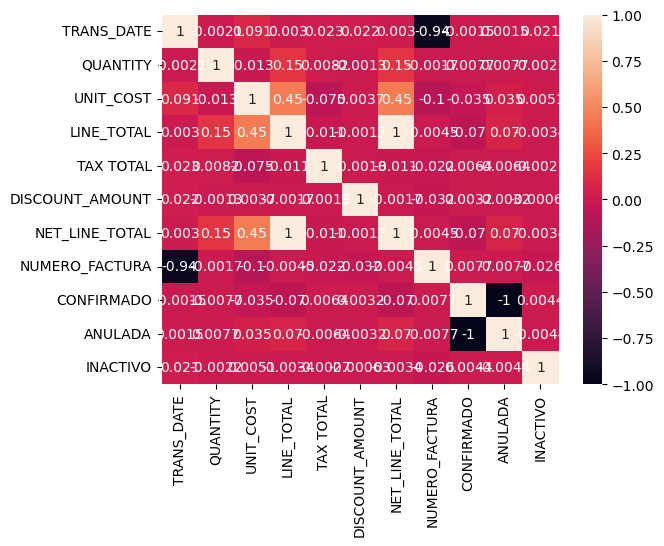

In [30]:
sns.heatmap(eliminarNulos.corr(), annot=True)

In [31]:
eliminarNulos.shape

(10435, 18)

In [32]:
eliminarNulos.head()

,TRANS_DATE,PRODUCT_NAME,PRODUCT_ID,QUANTITY,UNIT_COST,LINE_TOTAL,TAX TOTAL,DISCOUNT_AMOUNT,NET_LINE_TOTAL,NUMERO_FACTURA,CODIGO_CLIENTE,CONFIRMADO,ANULADA,INACTIVO,ZONA,CIUDAD_PRINCIPAL,SALESMAN,CLIENT_TYPE
0,2022.0,SEMITA 45 KG,PT-SUBPRODUCTO-00004,1.0,20.50,20.5,0.0,0.0,20.5,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,CUENCA,VEN03,COB
1,2022.0,HARINA TRADICION INTEGR 25 KG,PT-HARINA-00016,1.0,25.00,25.0,0.0,0.0,25.0,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,CUENCA,VEN03,COB
2,2022.0,HARINA TRADICION PREMIUM 50 KG,PT-HARINA-00006,20.0,45.10,902.0,0.0,0.0,902.0,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,CUENCA,VEN03,COB
3,2022.0,HARINA TRADICION PREMIUM 50 KG,PT-HARINA-00006,2.0,0.00,0.0,0.0,0.0,0.0,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,CUENCA,VEN03,COB
4,2022.0,MANTECA PANIF.BLOQ. 50KG T/S,BNPS-MANTECA-00007,4.0,114.85,459.4,0.0,0.0,459.4,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,CUENCA,VEN03,COB


In [33]:
# verificar si las columnas categoricas tienen subniveles y estas no seas irrelevantes
cols_cat = ["PRODUCT_NAME","PRODUCT_ID","CODIGO_CLIENTE","ZONA","CIUDAD_PRINCIPAL","SALESMAN","CLIENT_TYPE"]

for col in cols_cat:
    print(f'Columna {col}: {eliminarNulos[col].nunique()} subniveles')

Columna PRODUCT_NAME: 58 subniveles
Columna PRODUCT_ID: 54 subniveles
Columna CODIGO_CLIENTE: 1180 subniveles
Columna ZONA: 3 subniveles
Columna CIUDAD_PRINCIPAL: 3 subniveles
Columna SALESMAN: 3 subniveles
Columna CLIENT_TYPE: 2 subniveles


In [34]:
# se verifica q las columnas numericas no son irrelevantes
eliminarNulos.describe()

,TRANS_DATE,QUANTITY,UNIT_COST,LINE_TOTAL,TAX TOTAL,DISCOUNT_AMOUNT,NET_LINE_TOTAL,NUMERO_FACTURA,CONFIRMADO,ANULADA,INACTIVO
count,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,10435.000000,1.043500e+04,10435.000000,10435.000000,10435.000000
mean,2021.992142,25.193675,36.351358,792.958076,0.156553,0.002159,792.955917,1.001000e+12,0.977767,0.022233,0.000862
std,0.789241,255.424799,36.712405,5205.038670,1.729736,0.100191,5205.038837,1.525234e+03,0.147447,0.147447,0.029357
min,2021.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001000e+12,0.000000,0.000000,0.000000
25%,2021.000000,1.000000,9.150000,33.000000,0.000000,0.000000,33.000000,1.001000e+12,1.000000,0.000000,0.000000
50%,2022.000000,5.000000,42.000000,126.000000,0.000000,0.000000,126.000000,1.001000e+12,1.000000,0.000000,0.000000
75%,2023.000000,15.000000,45.000000,451.000000,0.000000,0.000000,451.000000,1.001000e+12,1.000000,0.000000,0.000000
max,2023.000000,25000.000000,1875.000000,459375.000000,52.580000,8.110000,459375.000000,1.001000e+12,1.000000,1.000000,1.000000


In [35]:
eliminarNulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10435 entries, 0 to 28345
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TRANS_DATE        10435 non-null  float64
 1   PRODUCT_NAME      10435 non-null  object 
 2   PRODUCT_ID        10435 non-null  object 
 3   QUANTITY          10435 non-null  float64
 4   UNIT_COST         10435 non-null  float64
 5   LINE_TOTAL        10435 non-null  float64
 6   TAX TOTAL         10435 non-null  float64
 7   DISCOUNT_AMOUNT   10435 non-null  float64
 8   NET_LINE_TOTAL    10435 non-null  float64
 9   NUMERO_FACTURA    10435 non-null  float64
 10  CODIGO_CLIENTE    10435 non-null  object 
 11  CONFIRMADO        10435 non-null  float64
 12  ANULADA           10435 non-null  float64
 13  INACTIVO          10435 non-null  float64
 14  ZONA              10435 non-null  object 
 15  CIUDAD_PRINCIPAL  10435 non-null  object 
 16  SALESMAN          10435 non-null  object

In [36]:
eliminarNulos.drop(columns=["UNIT_COST","LINE_TOTAL","TAX TOTAL","DISCOUNT_AMOUNT","PRODUCT_ID"],inplace=True)
eliminarNulos.columns

C:\Users\Gabo\AppData\Local\Temp\ipykernel_1704\1243942914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eliminarNulos.drop(columns=["UNIT_COST","LINE_TOTAL","TAX TOTAL","DISCOUNT_AMOUNT","PRODUCT_ID"],inplace=True)


Index(['TRANS_DATE', 'PRODUCT_NAME', 'QUANTITY', 'NET_LINE_TOTAL',
       'NUMERO_FACTURA', 'CODIGO_CLIENTE', 'CONFIRMADO', 'ANULADA', 'INACTIVO',
       'ZONA', 'CIUDAD_PRINCIPAL', 'SALESMAN', 'CLIENT_TYPE'],
      dtype='object')

In [37]:
eliminarNulos.describe()

,TRANS_DATE,QUANTITY,NET_LINE_TOTAL,NUMERO_FACTURA,CONFIRMADO,ANULADA,INACTIVO
count,10435.000000,10435.000000,10435.000000,1.043500e+04,10435.000000,10435.000000,10435.000000
mean,2021.992142,25.193675,792.955917,1.001000e+12,0.977767,0.022233,0.000862
std,0.789241,255.424799,5205.038837,1.525234e+03,0.147447,0.147447,0.029357
min,2021.000000,1.000000,0.000000,1.001000e+12,0.000000,0.000000,0.000000
25%,2021.000000,1.000000,33.000000,1.001000e+12,1.000000,0.000000,0.000000
50%,2022.000000,5.000000,126.000000,1.001000e+12,1.000000,0.000000,0.000000
75%,2023.000000,15.000000,451.000000,1.001000e+12,1.000000,0.000000,0.000000
max,2023.000000,25000.000000,459375.000000,1.001000e+12,1.000000,1.000000,1.000000


In [38]:
"""fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flat
columnas_numeric = eliminarNulos.select_dtypes(include=['float64', 'int']).columns
#columnas_numeric = columnas_numeric.drop('Price')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = eliminarNulos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
# Se eliminan los axes vacíos
for i in [6]:
    fig.delaxes(axes[i])    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");"""

'fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))\naxes = axes.flat\ncolumnas_numeric = eliminarNulos.select_dtypes(include=[\'float64\', \'int\']).columns\n#columnas_numeric = columnas_numeric.drop(\'Price\')\n\nfor i, colum in enumerate(columnas_numeric):\n    sns.histplot(\n        data    = eliminarNulos,\n        x       = colum,\n        stat    = "count",\n        kde     = True,\n        color   = (list(plt.rcParams[\'axes.prop_cycle\'])*2)[i]["color"],\n        line_kws= {\'linewidth\': 2},\n        alpha   = 0.3,\n        ax      = axes[i]\n    )\n    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")\n    axes[i].tick_params(labelsize = 6)\n    axes[i].set_xlabel("")\n    \n# Se eliminan los axes vacíos\nfor i in [6]:\n    fig.delaxes(axes[i])    \n    \nfig.tight_layout()\nplt.subplots_adjust(top = 0.9)\nfig.suptitle(\'Distribución variables numéricas\', fontsize = 10, fontweight = "bold");'

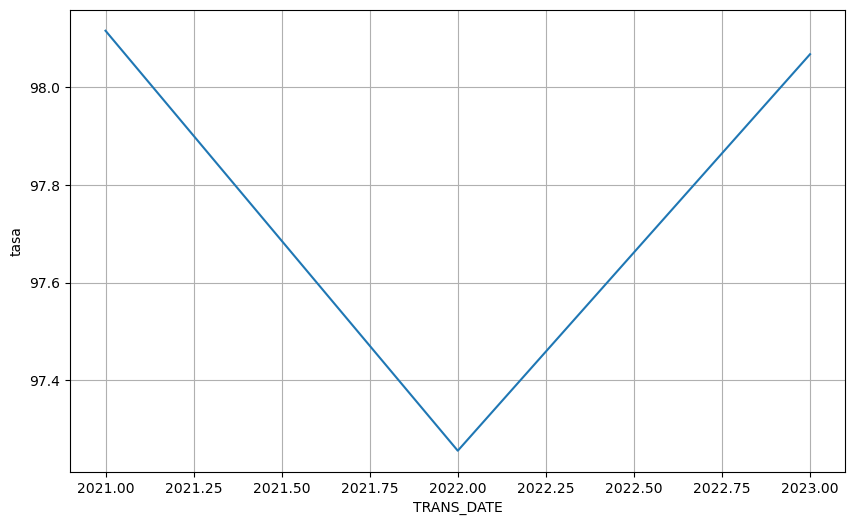

In [39]:
def graficar_tasas(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir
    grupo = eliminarNulos.groupby(x)[y].mean().mul(100).rename('tasa').reset_index()
    
    if type=='line':
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa', data=grupo)
        plt.grid()
    elif type=='bar':
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='tasa', data=grupo, order=order)
        plt.grid()
    elif type=='scatter':
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y='tasa', data=grupo)
        plt.grid()
        
graficar_tasas('TRANS_DATE','CONFIRMADO')

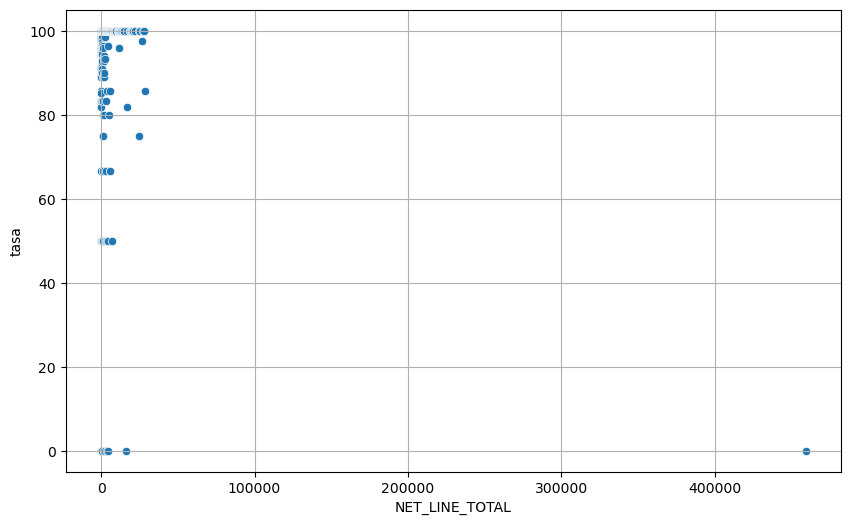

In [40]:
graficar_tasas('NET_LINE_TOTAL','CONFIRMADO',type='scatter')

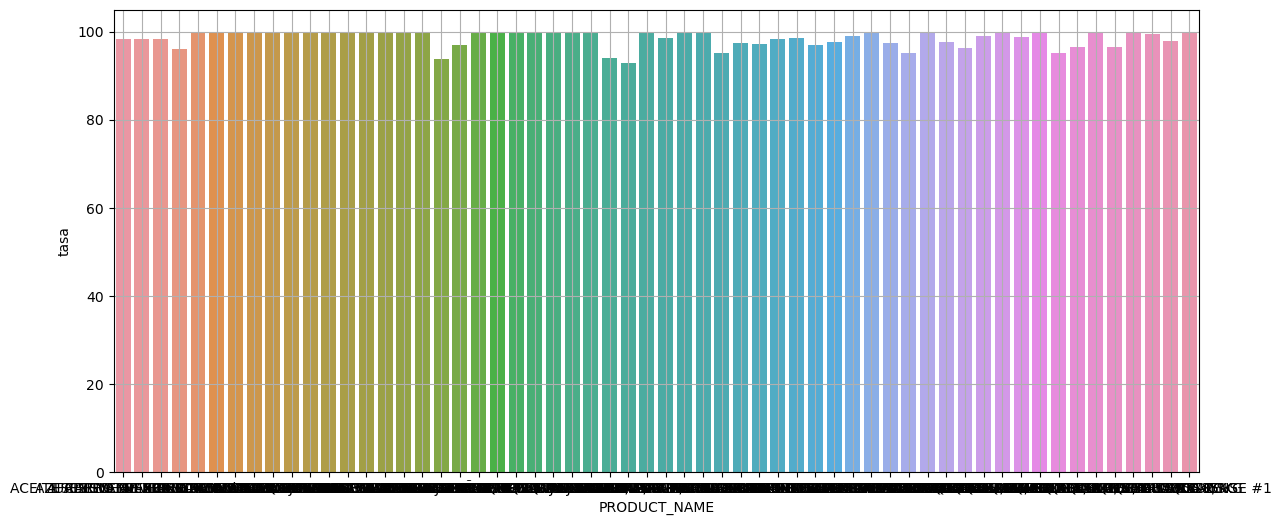

In [41]:
graficar_tasas("PRODUCT_NAME","CONFIRMADO", type='bar')

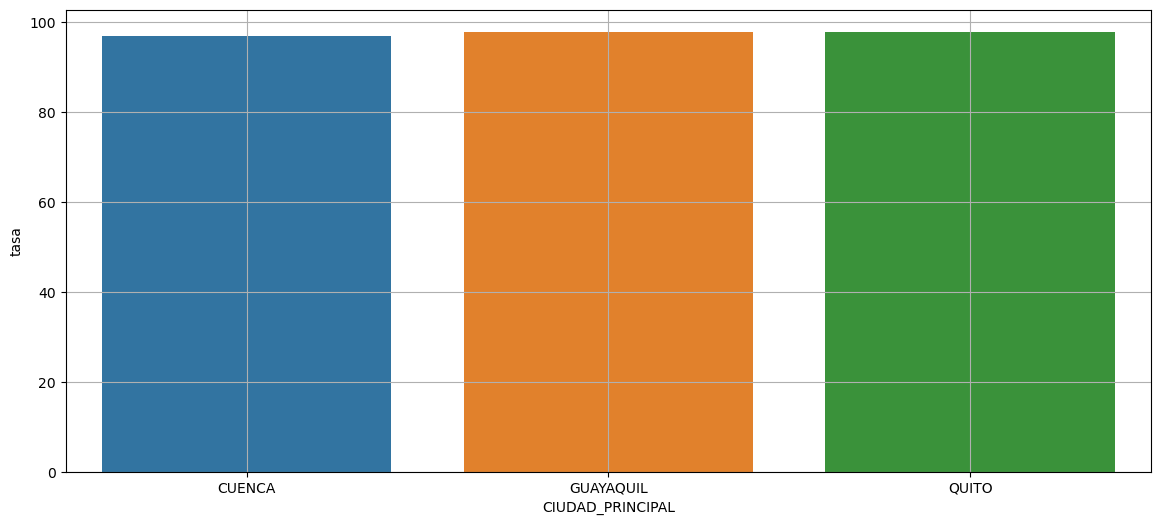

In [42]:
graficar_tasas("CIUDAD_PRINCIPAL","CONFIRMADO", type='bar')

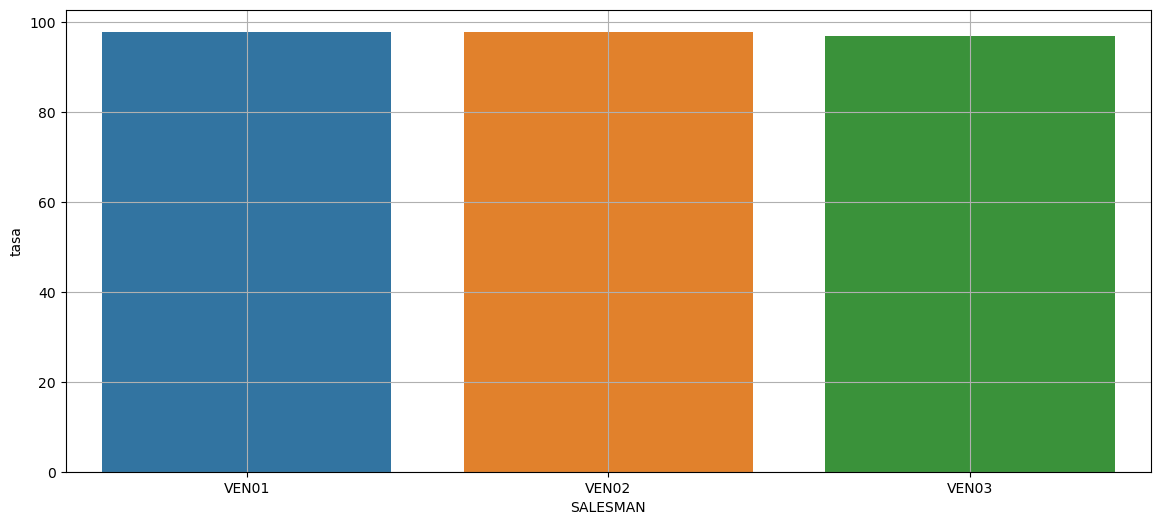

In [43]:
graficar_tasas("SALESMAN","CONFIRMADO", type='bar')

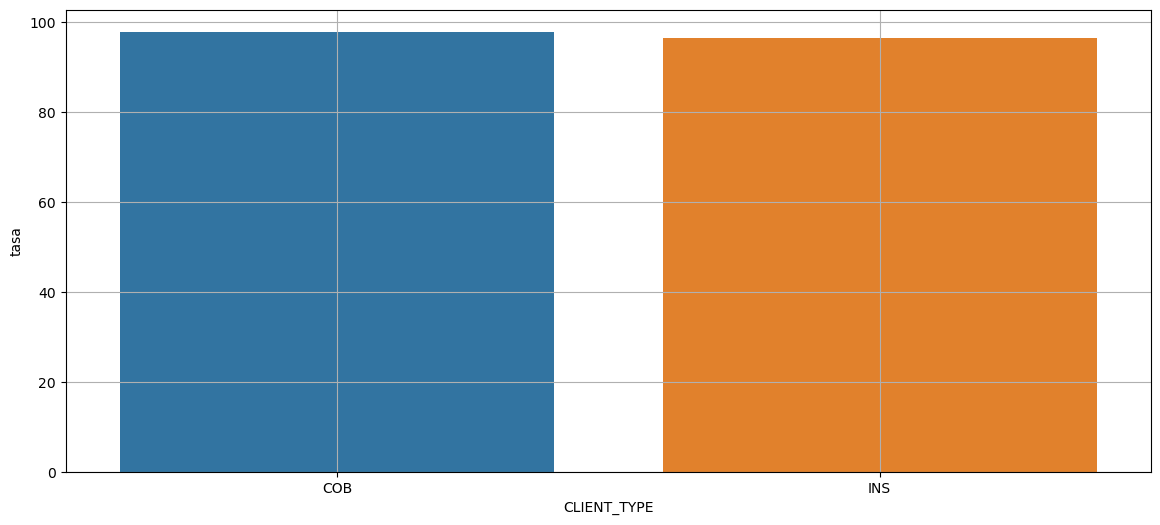

In [44]:
graficar_tasas("CLIENT_TYPE","CONFIRMADO", type='bar')

In [45]:
eliminarNulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10435 entries, 0 to 28345
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TRANS_DATE        10435 non-null  float64
 1   PRODUCT_NAME      10435 non-null  object 
 2   QUANTITY          10435 non-null  float64
 3   NET_LINE_TOTAL    10435 non-null  float64
 4   NUMERO_FACTURA    10435 non-null  float64
 5   CODIGO_CLIENTE    10435 non-null  object 
 6   CONFIRMADO        10435 non-null  float64
 7   ANULADA           10435 non-null  float64
 8   INACTIVO          10435 non-null  float64
 9   ZONA              10435 non-null  object 
 10  CIUDAD_PRINCIPAL  10435 non-null  object 
 11  SALESMAN          10435 non-null  object 
 12  CLIENT_TYPE       10435 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.1+ MB


In [46]:
date = pd.get_dummies(eliminarNulos["TRANS_DATE"], prefix="DATE")
zona = pd.get_dummies(eliminarNulos["ZONA"], prefix="ZONA")
ciudad = pd.get_dummies(eliminarNulos["CIUDAD_PRINCIPAL"], prefix="CIUDAD")
vendedor = pd.get_dummies(eliminarNulos["SALESMAN"], prefix="VENDEDOR")
tipo = pd.get_dummies(eliminarNulos["CLIENT_TYPE"], prefix="TIPO")
dfdummies = pd.concat([date, zona, ciudad, vendedor, tipo], axis=1)

dfdummies.head()

,DATE_2021.0,DATE_2022.0,DATE_2023.0,ZONA_CUE,ZONA_GYE,ZONA_UIO,CIUDAD_CUENCA,CIUDAD_GUAYAQUIL,CIUDAD_QUITO,VENDEDOR_VEN01,VENDEDOR_VEN02,VENDEDOR_VEN03,TIPO_COB,TIPO_INS
0,0,1,0,1,0,0,1,0,0,0,0,1,1,0
1,0,1,0,1,0,0,1,0,0,0,0,1,1,0
2,0,1,0,1,0,0,1,0,0,0,0,1,1,0
3,0,1,0,1,0,0,1,0,0,0,0,1,1,0
4,0,1,0,1,0,0,1,0,0,0,0,1,1,0


In [47]:
data = pd.concat([eliminarNulos, dfdummies], axis=1)
data.head(5)

,TRANS_DATE,PRODUCT_NAME,QUANTITY,NET_LINE_TOTAL,NUMERO_FACTURA,CODIGO_CLIENTE,CONFIRMADO,ANULADA,INACTIVO,ZONA,...,ZONA_GYE,ZONA_UIO,CIUDAD_CUENCA,CIUDAD_GUAYAQUIL,CIUDAD_QUITO,VENDEDOR_VEN01,VENDEDOR_VEN02,VENDEDOR_VEN03,TIPO_COB,TIPO_INS
0,2022.0,SEMITA 45 KG,1.0,20.5,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,...,0,0,1,0,0,0,0,1,1,0
1,2022.0,HARINA TRADICION INTEGR 25 KG,1.0,25.0,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,...,0,0,1,0,0,0,0,1,1,0
2,2022.0,HARINA TRADICION PREMIUM 50 KG,20.0,902.0,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,...,0,0,1,0,0,0,0,1,1,0
3,2022.0,HARINA TRADICION PREMIUM 50 KG,2.0,0.0,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,...,0,0,1,0,0,0,0,1,1,0
4,2022.0,MANTECA PANIF.BLOQ. 50KG T/S,4.0,459.4,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,...,0,0,1,0,0,0,0,1,1,0


In [48]:
data = data.drop(["TRANS_DATE","ZONA","CIUDAD_PRINCIPAL","SALESMAN","ZONA","CLIENT_TYPE"], axis=1)
data.head(5)

,PRODUCT_NAME,QUANTITY,NET_LINE_TOTAL,NUMERO_FACTURA,CODIGO_CLIENTE,CONFIRMADO,ANULADA,INACTIVO,DATE_2021.0,DATE_2022.0,...,ZONA_GYE,ZONA_UIO,CIUDAD_CUENCA,CIUDAD_GUAYAQUIL,CIUDAD_QUITO,VENDEDOR_VEN01,VENDEDOR_VEN02,VENDEDOR_VEN03,TIPO_COB,TIPO_INS
0,SEMITA 45 KG,1.0,20.5,1.001000e+12,CL001256,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,1,0
1,HARINA TRADICION INTEGR 25 KG,1.0,25.0,1.001000e+12,CL001256,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,HARINA TRADICION PREMIUM 50 KG,20.0,902.0,1.001000e+12,CL001256,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,1,0
3,HARINA TRADICION PREMIUM 50 KG,2.0,0.0,1.001000e+12,CL001256,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,1,0
4,MANTECA PANIF.BLOQ. 50KG T/S,4.0,459.4,1.001000e+12,CL001256,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,1,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10435 entries, 0 to 28345
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PRODUCT_NAME      10435 non-null  object 
 1   QUANTITY          10435 non-null  float64
 2   NET_LINE_TOTAL    10435 non-null  float64
 3   NUMERO_FACTURA    10435 non-null  float64
 4   CODIGO_CLIENTE    10435 non-null  object 
 5   CONFIRMADO        10435 non-null  float64
 6   ANULADA           10435 non-null  float64
 7   INACTIVO          10435 non-null  float64
 8   DATE_2021.0       10435 non-null  uint8  
 9   DATE_2022.0       10435 non-null  uint8  
 10  DATE_2023.0       10435 non-null  uint8  
 11  ZONA_CUE          10435 non-null  uint8  
 12  ZONA_GYE          10435 non-null  uint8  
 13  ZONA_UIO          10435 non-null  uint8  
 14  CIUDAD_CUENCA     10435 non-null  uint8  
 15  CIUDAD_GUAYAQUIL  10435 non-null  uint8  
 16  CIUDAD_QUITO      10435 non-null  uint8 

In [50]:
#tranformar columnas
from sklearn import preprocessing
endoder = preprocessing.LabelEncoder()
data["PRODUCT_NAME"] = endoder.fit_transform(data["PRODUCT_NAME"])
data["PRODUCT_NAME"].unique()
data["CODIGO_CLIENTE"] = endoder.fit_transform(data["CODIGO_CLIENTE"])
data["CODIGO_CLIENTE"].unique()

array([ 134,  401,  140, ..., 1115,   36,  903])

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10435 entries, 0 to 28345
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PRODUCT_NAME      10435 non-null  int32  
 1   QUANTITY          10435 non-null  float64
 2   NET_LINE_TOTAL    10435 non-null  float64
 3   NUMERO_FACTURA    10435 non-null  float64
 4   CODIGO_CLIENTE    10435 non-null  int32  
 5   CONFIRMADO        10435 non-null  float64
 6   ANULADA           10435 non-null  float64
 7   INACTIVO          10435 non-null  float64
 8   DATE_2021.0       10435 non-null  uint8  
 9   DATE_2022.0       10435 non-null  uint8  
 10  DATE_2023.0       10435 non-null  uint8  
 11  ZONA_CUE          10435 non-null  uint8  
 12  ZONA_GYE          10435 non-null  uint8  
 13  ZONA_UIO          10435 non-null  uint8  
 14  CIUDAD_CUENCA     10435 non-null  uint8  
 15  CIUDAD_GUAYAQUIL  10435 non-null  uint8  
 16  CIUDAD_QUITO      10435 non-null  uint8 

In [52]:
data.to_excel("data_limpia.xlsx")  #guardar la data limpia

# 3. Dividir la data en train y test

In [53]:
# separar las caracteristicas de la etiqueta
x = data.iloc[:,1:]
y = data["CONFIRMADO"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.7, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3130, 21), (7305, 21), (3130,), (7305,))

# 4. Algoritmo Supervisado

# Modelo Uno de Prediccion con Arbol de Decisiones

In [54]:
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
y_pred = modelo.predict(x_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [56]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       159
         1.0       1.00      1.00      1.00      7146

    accuracy                           1.00      7305
   macro avg       1.00      1.00      1.00      7305
weighted avg       1.00      1.00      1.00      7305



In [57]:
matriz = confusion_matrix(y_test, y_pred)
matriz

array([[ 159,    0],
       [   0, 7146]], dtype=int64)

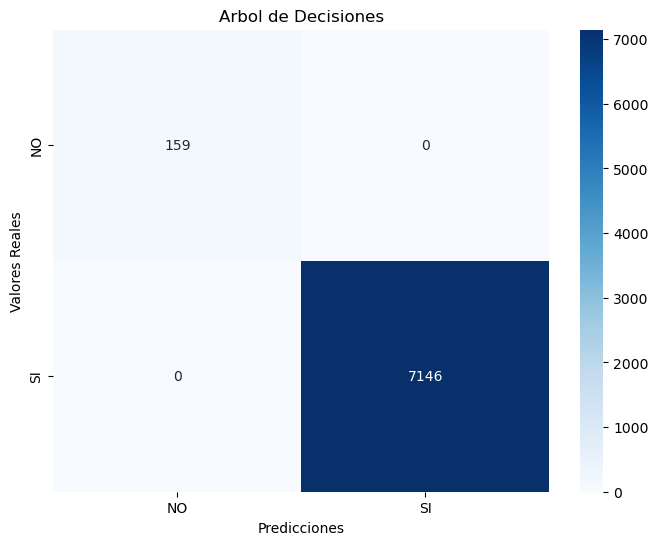

In [58]:
plt.figure(figsize=(8,6))
labels = ["NO","SI"]
sns.heatmap(matriz, annot=True, cmap="Blues", fmt="d", xticklabels= labels, yticklabels=labels)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")

plt.title("Arbol de Decisiones")
plt.show()

In [59]:
# permite conocer que tan acertada es la prediccion para facturas confirmadas es decir realizada la venta
prediccion = modelo.predict_proba(X= x_test)
prediccion = pd.DataFrame(prediccion, columns=modelo.classes_)
prediccion

,0.0,1.0
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
7300,0.0,1.0
7301,0.0,1.0
7302,0.0,1.0
7303,0.0,1.0


# Modelo Dos de Prediccion con Arbol de Decisiones

In [60]:
# separar las caracteristicas de la etiqueta
x = data.iloc[:,1:]
y = data["INACTIVO"]
x1_train, x1_test, y1_train, y1_test = train_test_split(x,y, test_size=0.7, random_state=42)
x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape

((3130, 21), (7305, 21), (3130,), (7305,))

In [61]:
modelo1 = DecisionTreeClassifier(random_state=42)
modelo1.fit(x1_train,y1_train)

DecisionTreeClassifier(random_state=42)

In [62]:
y1_pred = modelo1.predict(x1_test)
y1_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [63]:
report = classification_report(y1_test,y1_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7298
         1.0       1.00      1.00      1.00         7

    accuracy                           1.00      7305
   macro avg       1.00      1.00      1.00      7305
weighted avg       1.00      1.00      1.00      7305



In [64]:
matriz = confusion_matrix(y1_test, y1_pred)
matriz

array([[7298,    0],
       [   0,    7]], dtype=int64)

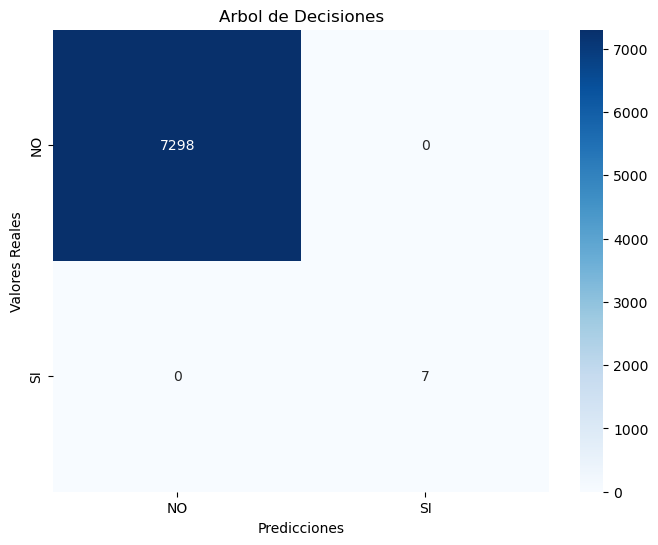

In [65]:
plt.figure(figsize=(8,6))
labels = ["NO","SI"]
sns.heatmap(matriz, annot=True, cmap="Blues", fmt="d", xticklabels= labels, yticklabels=labels)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")

plt.title("Arbol de Decisiones")
plt.show()

In [66]:
# permite conocer que tan acertada es la prediccion para clientes inactivos
prediccion = modelo1.predict_proba(X= x_test)
prediccion = pd.DataFrame(prediccion, columns=modelo.classes_)
prediccion

,0.0,1.0
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
7300,1.0,0.0
7301,1.0,0.0
7302,1.0,0.0
7303,1.0,0.0


# Modelo de Clasificacion 01

In [67]:
eliminarNulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10435 entries, 0 to 28345
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TRANS_DATE        10435 non-null  float64
 1   PRODUCT_NAME      10435 non-null  object 
 2   QUANTITY          10435 non-null  float64
 3   NET_LINE_TOTAL    10435 non-null  float64
 4   NUMERO_FACTURA    10435 non-null  float64
 5   CODIGO_CLIENTE    10435 non-null  object 
 6   CONFIRMADO        10435 non-null  float64
 7   ANULADA           10435 non-null  float64
 8   INACTIVO          10435 non-null  float64
 9   ZONA              10435 non-null  object 
 10  CIUDAD_PRINCIPAL  10435 non-null  object 
 11  SALESMAN          10435 non-null  object 
 12  CLIENT_TYPE       10435 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.1+ MB


In [68]:
date = pd.get_dummies(eliminarNulos["TRANS_DATE"], prefix="DATE")
zona = pd.get_dummies(eliminarNulos["ZONA"], prefix="ZONA")
ciudad = pd.get_dummies(eliminarNulos["CIUDAD_PRINCIPAL"], prefix="CIUDAD")
vendedor = pd.get_dummies(eliminarNulos["SALESMAN"], prefix="VENDEDOR")
tipo = pd.get_dummies(eliminarNulos["CLIENT_TYPE"], prefix="TIPO")
dfdummies = pd.concat([date, zona, ciudad, vendedor, tipo], axis=1)

dfdummies.head()

,DATE_2021.0,DATE_2022.0,DATE_2023.0,ZONA_CUE,ZONA_GYE,ZONA_UIO,CIUDAD_CUENCA,CIUDAD_GUAYAQUIL,CIUDAD_QUITO,VENDEDOR_VEN01,VENDEDOR_VEN02,VENDEDOR_VEN03,TIPO_COB,TIPO_INS
0,0,1,0,1,0,0,1,0,0,0,0,1,1,0
1,0,1,0,1,0,0,1,0,0,0,0,1,1,0
2,0,1,0,1,0,0,1,0,0,0,0,1,1,0
3,0,1,0,1,0,0,1,0,0,0,0,1,1,0
4,0,1,0,1,0,0,1,0,0,0,0,1,1,0


In [69]:
data1 = pd.concat([eliminarNulos, dfdummies], axis=1)
data1.head(5)

,TRANS_DATE,PRODUCT_NAME,QUANTITY,NET_LINE_TOTAL,NUMERO_FACTURA,CODIGO_CLIENTE,CONFIRMADO,ANULADA,INACTIVO,ZONA,...,ZONA_GYE,ZONA_UIO,CIUDAD_CUENCA,CIUDAD_GUAYAQUIL,CIUDAD_QUITO,VENDEDOR_VEN01,VENDEDOR_VEN02,VENDEDOR_VEN03,TIPO_COB,TIPO_INS
0,2022.0,SEMITA 45 KG,1.0,20.5,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,...,0,0,1,0,0,0,0,1,1,0
1,2022.0,HARINA TRADICION INTEGR 25 KG,1.0,25.0,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,...,0,0,1,0,0,0,0,1,1,0
2,2022.0,HARINA TRADICION PREMIUM 50 KG,20.0,902.0,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,...,0,0,1,0,0,0,0,1,1,0
3,2022.0,HARINA TRADICION PREMIUM 50 KG,2.0,0.0,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,...,0,0,1,0,0,0,0,1,1,0
4,2022.0,MANTECA PANIF.BLOQ. 50KG T/S,4.0,459.4,1.001000e+12,CL001256,1.0,0.0,0.0,CUE,...,0,0,1,0,0,0,0,1,1,0


In [70]:
data1 = data1.drop(["TRANS_DATE","ZONA","CIUDAD_PRINCIPAL","SALESMAN","ZONA","CLIENT_TYPE"], axis=1)
data1.head(5)

,PRODUCT_NAME,QUANTITY,NET_LINE_TOTAL,NUMERO_FACTURA,CODIGO_CLIENTE,CONFIRMADO,ANULADA,INACTIVO,DATE_2021.0,DATE_2022.0,...,ZONA_GYE,ZONA_UIO,CIUDAD_CUENCA,CIUDAD_GUAYAQUIL,CIUDAD_QUITO,VENDEDOR_VEN01,VENDEDOR_VEN02,VENDEDOR_VEN03,TIPO_COB,TIPO_INS
0,SEMITA 45 KG,1.0,20.5,1.001000e+12,CL001256,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,1,0
1,HARINA TRADICION INTEGR 25 KG,1.0,25.0,1.001000e+12,CL001256,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,HARINA TRADICION PREMIUM 50 KG,20.0,902.0,1.001000e+12,CL001256,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,1,0
3,HARINA TRADICION PREMIUM 50 KG,2.0,0.0,1.001000e+12,CL001256,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,1,0
4,MANTECA PANIF.BLOQ. 50KG T/S,4.0,459.4,1.001000e+12,CL001256,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,1,0


In [71]:
from sklearn import preprocessing
endoder = preprocessing.LabelEncoder()
data1["CODIGO_CLIENTE"] = endoder.fit_transform(data1["CODIGO_CLIENTE"])
data1["CODIGO_CLIENTE"].unique()

array([ 134,  401,  140, ..., 1115,   36,  903])

In [72]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10435 entries, 0 to 28345
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PRODUCT_NAME      10435 non-null  object 
 1   QUANTITY          10435 non-null  float64
 2   NET_LINE_TOTAL    10435 non-null  float64
 3   NUMERO_FACTURA    10435 non-null  float64
 4   CODIGO_CLIENTE    10435 non-null  int32  
 5   CONFIRMADO        10435 non-null  float64
 6   ANULADA           10435 non-null  float64
 7   INACTIVO          10435 non-null  float64
 8   DATE_2021.0       10435 non-null  uint8  
 9   DATE_2022.0       10435 non-null  uint8  
 10  DATE_2023.0       10435 non-null  uint8  
 11  ZONA_CUE          10435 non-null  uint8  
 12  ZONA_GYE          10435 non-null  uint8  
 13  ZONA_UIO          10435 non-null  uint8  
 14  CIUDAD_CUENCA     10435 non-null  uint8  
 15  CIUDAD_GUAYAQUIL  10435 non-null  uint8  
 16  CIUDAD_QUITO      10435 non-null  uint8 

In [73]:
x2_train = data1.iloc[:,1:]
x2_train


,QUANTITY,NET_LINE_TOTAL,NUMERO_FACTURA,CODIGO_CLIENTE,CONFIRMADO,ANULADA,INACTIVO,DATE_2021.0,DATE_2022.0,DATE_2023.0,...,ZONA_GYE,ZONA_UIO,CIUDAD_CUENCA,CIUDAD_GUAYAQUIL,CIUDAD_QUITO,VENDEDOR_VEN01,VENDEDOR_VEN02,VENDEDOR_VEN03,TIPO_COB,TIPO_INS
0,1.0,20.5,1.001000e+12,134,1.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
1,1.0,25.0,1.001000e+12,134,1.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
2,20.0,902.0,1.001000e+12,134,1.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
3,2.0,0.0,1.001000e+12,134,1.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
4,4.0,459.4,1.001000e+12,134,1.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28333,2.0,41.0,1.001000e+12,317,1.0,0.0,0.0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
28341,1.0,44.5,1.001000e+12,1115,1.0,0.0,0.0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
28342,35.0,735.0,1.001000e+12,36,1.0,0.0,0.0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
28344,100.0,4510.0,1.001000e+12,903,1.0,0.0,0.0,0,1,0,...,0,1,0,0,1,1,0,0,1,0


In [74]:
y2_train = data1.iloc[:,0]
y2_train

0                          SEMITA 45 KG
1         HARINA TRADICION INTEGR 25 KG
2        HARINA TRADICION PREMIUM 50 KG
3        HARINA TRADICION PREMIUM 50 KG
4          MANTECA PANIF.BLOQ. 50KG T/S
                      ...              
28333                      SEMITA 45 KG
28341      HARINA TRADICION PLUS 50 KG.
28342                      SEMITA 45 KG
28344    HARINA TRADICION PREMIUM 50 KG
28345    HARINA TRADICION PREMIUM 50 KG
Name: PRODUCT_NAME, Length: 10435, dtype: object

In [75]:
from sklearn.svm import SVC
modelo2 = SVC()
modelo2.fit(x2_train, y2_train)

SVC()

In [76]:
x2_test = pd.DataFrame({'QUANTITY':[5],'NET_LINE_TOTAL':[25.0],'NUMERO_FACTURA':[2001000084198],'CODIGO_CLIENTE':[401],'CONFIRMADO':[1],'ANULADA':[0],'INACTIVO':[0],'DATE_2021.0':[0],'DATE_2022.0':[0],'DATE_2023.0':[1],'ZONA_CUE':[0],'ZONA_GYE':[0],'ZONA_UIO':[1],'CIUDAD_CUENCA':[0],'CIUDAD_GUAYAQUIL':[0],'CIUDAD_QUITO':[1],'VENDEDOR_VEN01':[1],'VENDEDOR_VEN02':[0],'VENDEDOR_VEN03':[0],'TIPO_COB':[1],'TIPO_INS':[1]})
x2_test

,QUANTITY,NET_LINE_TOTAL,NUMERO_FACTURA,CODIGO_CLIENTE,CONFIRMADO,ANULADA,INACTIVO,DATE_2021.0,DATE_2022.0,DATE_2023.0,...,ZONA_GYE,ZONA_UIO,CIUDAD_CUENCA,CIUDAD_GUAYAQUIL,CIUDAD_QUITO,VENDEDOR_VEN01,VENDEDOR_VEN02,VENDEDOR_VEN03,TIPO_COB,TIPO_INS
0,5,25.0,2001000084198,401,1,0,0,0,0,1,...,0,1,0,0,1,1,0,0,1,1


In [77]:
modelo2.predict(x2_test)

array(['HARINA TRADICION PREMIUM 50 KG'], dtype=object)

# Modelo de Clasificacion 02

In [78]:
# division de la data para entrenamiento y prueba, para verificar que tan bueno o malo es el modelo con una metrica
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10435 entries, 0 to 28345
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PRODUCT_NAME      10435 non-null  object 
 1   QUANTITY          10435 non-null  float64
 2   NET_LINE_TOTAL    10435 non-null  float64
 3   NUMERO_FACTURA    10435 non-null  float64
 4   CODIGO_CLIENTE    10435 non-null  int32  
 5   CONFIRMADO        10435 non-null  float64
 6   ANULADA           10435 non-null  float64
 7   INACTIVO          10435 non-null  float64
 8   DATE_2021.0       10435 non-null  uint8  
 9   DATE_2022.0       10435 non-null  uint8  
 10  DATE_2023.0       10435 non-null  uint8  
 11  ZONA_CUE          10435 non-null  uint8  
 12  ZONA_GYE          10435 non-null  uint8  
 13  ZONA_UIO          10435 non-null  uint8  
 14  CIUDAD_CUENCA     10435 non-null  uint8  
 15  CIUDAD_GUAYAQUIL  10435 non-null  uint8  
 16  CIUDAD_QUITO      10435 non-null  uint8 

In [79]:
# dataframe para el entrenamiento
train1 = data1.iloc[0:8349 ,:]
train1

,PRODUCT_NAME,QUANTITY,NET_LINE_TOTAL,NUMERO_FACTURA,CODIGO_CLIENTE,CONFIRMADO,ANULADA,INACTIVO,DATE_2021.0,DATE_2022.0,...,ZONA_GYE,ZONA_UIO,CIUDAD_CUENCA,CIUDAD_GUAYAQUIL,CIUDAD_QUITO,VENDEDOR_VEN01,VENDEDOR_VEN02,VENDEDOR_VEN03,TIPO_COB,TIPO_INS
0,SEMITA 45 KG,1.0,20.50,1.001000e+12,134,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,1,0
1,HARINA TRADICION INTEGR 25 KG,1.0,25.00,1.001000e+12,134,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,HARINA TRADICION PREMIUM 50 KG,20.0,902.00,1.001000e+12,134,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,1,0
3,HARINA TRADICION PREMIUM 50 KG,2.0,0.00,1.001000e+12,134,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,1,0
4,MANTECA PANIF.BLOQ. 50KG T/S,4.0,459.40,1.001000e+12,134,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21861,HARINA TRADICION PREMIUM 50 KG,30.0,1353.00,1.001000e+12,505,1.0,0.0,0.0,0,1,...,0,1,0,0,1,1,0,0,1,0
21862,MANTECA PANIF.BLOQ. 50KG T/S,6.0,689.10,1.001000e+12,505,1.0,0.0,0.0,0,1,...,0,1,0,0,1,1,0,0,1,0
21863,MARGARINA ALESIN BLOQ.50KG T/S,6.0,689.10,1.001000e+12,505,1.0,0.0,0.0,0,1,...,0,1,0,0,1,1,0,0,1,0
21864,AZUCAR VALDEZ AL GRANEL 50 KG,6.0,270.00,1.001000e+12,505,1.0,0.0,0.0,0,1,...,0,1,0,0,1,1,0,0,1,0


In [80]:
# dataframe para las pruebas
test1 = data1.iloc[8349: , :]
test1

,PRODUCT_NAME,QUANTITY,NET_LINE_TOTAL,NUMERO_FACTURA,CODIGO_CLIENTE,CONFIRMADO,ANULADA,INACTIVO,DATE_2021.0,DATE_2022.0,...,ZONA_GYE,ZONA_UIO,CIUDAD_CUENCA,CIUDAD_GUAYAQUIL,CIUDAD_QUITO,VENDEDOR_VEN01,VENDEDOR_VEN02,VENDEDOR_VEN03,TIPO_COB,TIPO_INS
21866,ESENCIA GL.3900ML MANTEQ. PREM,1.0,18.68,1.001000e+12,505,1.0,0.0,0.0,0,1,...,0,1,0,0,1,1,0,0,1,0
21888,SEMITA 45 KG,45.0,945.00,1.001000e+12,1148,1.0,0.0,0.0,1,0,...,0,1,0,0,1,1,0,0,1,0
21889,LEVADURA SAF INSTANT ORO 500GR,2.0,6.42,1.001000e+12,556,1.0,0.0,0.0,1,0,...,0,0,1,0,0,0,0,1,1,0
21890,ESENCIA ENV 500ML MANTEQ ESTAN,1.0,2.62,1.001000e+12,556,1.0,0.0,0.0,1,0,...,0,0,1,0,0,0,0,1,1,0
21909,HARINA TRADICION PREMIUM 50 KG,1.0,42.50,1.001000e+12,592,1.0,0.0,0.0,1,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28333,SEMITA 45 KG,2.0,41.00,1.001000e+12,317,1.0,0.0,0.0,0,1,...,0,1,0,0,1,1,0,0,0,1
28341,HARINA TRADICION PLUS 50 KG.,1.0,44.50,1.001000e+12,1115,1.0,0.0,0.0,0,1,...,0,1,0,0,1,1,0,0,0,1
28342,SEMITA 45 KG,35.0,735.00,1.001000e+12,36,1.0,0.0,0.0,0,1,...,0,1,0,0,1,1,0,0,1,0
28344,HARINA TRADICION PREMIUM 50 KG,100.0,4510.00,1.001000e+12,903,1.0,0.0,0.0,0,1,...,0,1,0,0,1,1,0,0,1,0


In [81]:
x3_train = train1.iloc[:,1:]
x3_train

,QUANTITY,NET_LINE_TOTAL,NUMERO_FACTURA,CODIGO_CLIENTE,CONFIRMADO,ANULADA,INACTIVO,DATE_2021.0,DATE_2022.0,DATE_2023.0,...,ZONA_GYE,ZONA_UIO,CIUDAD_CUENCA,CIUDAD_GUAYAQUIL,CIUDAD_QUITO,VENDEDOR_VEN01,VENDEDOR_VEN02,VENDEDOR_VEN03,TIPO_COB,TIPO_INS
0,1.0,20.50,1.001000e+12,134,1.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
1,1.0,25.00,1.001000e+12,134,1.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
2,20.0,902.00,1.001000e+12,134,1.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
3,2.0,0.00,1.001000e+12,134,1.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
4,4.0,459.40,1.001000e+12,134,1.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21861,30.0,1353.00,1.001000e+12,505,1.0,0.0,0.0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
21862,6.0,689.10,1.001000e+12,505,1.0,0.0,0.0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
21863,6.0,689.10,1.001000e+12,505,1.0,0.0,0.0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
21864,6.0,270.00,1.001000e+12,505,1.0,0.0,0.0,0,1,0,...,0,1,0,0,1,1,0,0,1,0


In [82]:
y3_train = train1.iloc[:,0]
y3_train

0                          SEMITA 45 KG
1         HARINA TRADICION INTEGR 25 KG
2        HARINA TRADICION PREMIUM 50 KG
3        HARINA TRADICION PREMIUM 50 KG
4          MANTECA PANIF.BLOQ. 50KG T/S
                      ...              
21861    HARINA TRADICION PREMIUM 50 KG
21862      MANTECA PANIF.BLOQ. 50KG T/S
21863    MARGARINA ALESIN BLOQ.50KG T/S
21864    AZUCAR VALDEZ AL GRANEL  50 KG
21865    ESENCIA GL.3900ML COCO PREMIUN
Name: PRODUCT_NAME, Length: 8349, dtype: object

In [83]:
x3_test = test1.iloc[:,1:]
x3_test

,QUANTITY,NET_LINE_TOTAL,NUMERO_FACTURA,CODIGO_CLIENTE,CONFIRMADO,ANULADA,INACTIVO,DATE_2021.0,DATE_2022.0,DATE_2023.0,...,ZONA_GYE,ZONA_UIO,CIUDAD_CUENCA,CIUDAD_GUAYAQUIL,CIUDAD_QUITO,VENDEDOR_VEN01,VENDEDOR_VEN02,VENDEDOR_VEN03,TIPO_COB,TIPO_INS
21866,1.0,18.68,1.001000e+12,505,1.0,0.0,0.0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
21888,45.0,945.00,1.001000e+12,1148,1.0,0.0,0.0,1,0,0,...,0,1,0,0,1,1,0,0,1,0
21889,2.0,6.42,1.001000e+12,556,1.0,0.0,0.0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
21890,1.0,2.62,1.001000e+12,556,1.0,0.0,0.0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
21909,1.0,42.50,1.001000e+12,592,1.0,0.0,0.0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28333,2.0,41.00,1.001000e+12,317,1.0,0.0,0.0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
28341,1.0,44.50,1.001000e+12,1115,1.0,0.0,0.0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
28342,35.0,735.00,1.001000e+12,36,1.0,0.0,0.0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
28344,100.0,4510.00,1.001000e+12,903,1.0,0.0,0.0,0,1,0,...,0,1,0,0,1,1,0,0,1,0


In [84]:
y3_test = test1.iloc[:,0]
y3_test

21866    ESENCIA GL.3900ML MANTEQ. PREM
21888                      SEMITA 45 KG
21889    LEVADURA SAF INSTANT ORO 500GR
21890    ESENCIA ENV 500ML MANTEQ ESTAN
21909    HARINA TRADICION PREMIUM 50 KG
                      ...              
28333                      SEMITA 45 KG
28341      HARINA TRADICION PLUS 50 KG.
28342                      SEMITA 45 KG
28344    HARINA TRADICION PREMIUM 50 KG
28345    HARINA TRADICION PREMIUM 50 KG
Name: PRODUCT_NAME, Length: 2086, dtype: object

In [85]:
#x3_train, x3_test, y3_train, y3_test = train_test_split(train1,train1, test_size=0.7, random_state=42)

In [86]:
"""from sklearn.svm import SVC
modelo3 = SVC()
modelo3.fit(x3_train, y3_train)"""
modelo3 = DecisionTreeClassifier(random_state=42)
modelo3.fit(x3_train,y3_train)

DecisionTreeClassifier(random_state=42)

In [87]:
predicted = modelo3.predict(x3_test)
predicted

array(['ESENCIA GL.3900ML MANTEQ. PREM', 'SEMITA 45 KG',
       'LEVADURA SAF INSTANT ORO 500GR', ..., 'AFRECHO DE TRIGO 40 KG.',
       'HARINA TRADICION PLUS 50 KG.', 'HARINA TRADICION PLUS 50 KG.'],
      dtype=object)

In [88]:
test2 = pd.DataFrame(test1)
test2['predicted'] = predicted
test2

,PRODUCT_NAME,QUANTITY,NET_LINE_TOTAL,NUMERO_FACTURA,CODIGO_CLIENTE,CONFIRMADO,ANULADA,INACTIVO,DATE_2021.0,DATE_2022.0,...,ZONA_UIO,CIUDAD_CUENCA,CIUDAD_GUAYAQUIL,CIUDAD_QUITO,VENDEDOR_VEN01,VENDEDOR_VEN02,VENDEDOR_VEN03,TIPO_COB,TIPO_INS,predicted
21866,ESENCIA GL.3900ML MANTEQ. PREM,1.0,18.68,1.001000e+12,505,1.0,0.0,0.0,0,1,...,1,0,0,1,1,0,0,1,0,ESENCIA GL.3900ML MANTEQ. PREM
21888,SEMITA 45 KG,45.0,945.00,1.001000e+12,1148,1.0,0.0,0.0,1,0,...,1,0,0,1,1,0,0,1,0,SEMITA 45 KG
21889,LEVADURA SAF INSTANT ORO 500GR,2.0,6.42,1.001000e+12,556,1.0,0.0,0.0,1,0,...,0,1,0,0,0,0,1,1,0,LEVADURA SAF INSTANT ORO 500GR
21890,ESENCIA ENV 500ML MANTEQ ESTAN,1.0,2.62,1.001000e+12,556,1.0,0.0,0.0,1,0,...,0,1,0,0,0,0,1,1,0,ESENCIA ENV 500MLVAINIL NE EST
21909,HARINA TRADICION PREMIUM 50 KG,1.0,42.50,1.001000e+12,592,1.0,0.0,0.0,1,0,...,0,1,0,0,0,0,1,1,0,HARINA TRADICION PREMIUM 50 KG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28333,SEMITA 45 KG,2.0,41.00,1.001000e+12,317,1.0,0.0,0.0,0,1,...,1,0,0,1,1,0,0,0,1,SEMITA 45 KG
28341,HARINA TRADICION PLUS 50 KG.,1.0,44.50,1.001000e+12,1115,1.0,0.0,0.0,0,1,...,1,0,0,1,1,0,0,0,1,HARINA TRADICION PREMIUM 50 KG
28342,SEMITA 45 KG,35.0,735.00,1.001000e+12,36,1.0,0.0,0.0,0,1,...,1,0,0,1,1,0,0,1,0,AFRECHO DE TRIGO 40 KG.
28344,HARINA TRADICION PREMIUM 50 KG,100.0,4510.00,1.001000e+12,903,1.0,0.0,0.0,0,1,...,1,0,0,1,1,0,0,1,0,HARINA TRADICION PLUS 50 KG.


In [89]:
first_column = test2.pop('predicted')
# cambiar la posicion de la columna predicted al inicio para verificar la prediccion y el entrenamiento
test2.insert(0, 'predicted', first_column)
test2

,predicted,PRODUCT_NAME,QUANTITY,NET_LINE_TOTAL,NUMERO_FACTURA,CODIGO_CLIENTE,CONFIRMADO,ANULADA,INACTIVO,DATE_2021.0,...,ZONA_GYE,ZONA_UIO,CIUDAD_CUENCA,CIUDAD_GUAYAQUIL,CIUDAD_QUITO,VENDEDOR_VEN01,VENDEDOR_VEN02,VENDEDOR_VEN03,TIPO_COB,TIPO_INS
21866,ESENCIA GL.3900ML MANTEQ. PREM,ESENCIA GL.3900ML MANTEQ. PREM,1.0,18.68,1.001000e+12,505,1.0,0.0,0.0,0,...,0,1,0,0,1,1,0,0,1,0
21888,SEMITA 45 KG,SEMITA 45 KG,45.0,945.00,1.001000e+12,1148,1.0,0.0,0.0,1,...,0,1,0,0,1,1,0,0,1,0
21889,LEVADURA SAF INSTANT ORO 500GR,LEVADURA SAF INSTANT ORO 500GR,2.0,6.42,1.001000e+12,556,1.0,0.0,0.0,1,...,0,0,1,0,0,0,0,1,1,0
21890,ESENCIA ENV 500MLVAINIL NE EST,ESENCIA ENV 500ML MANTEQ ESTAN,1.0,2.62,1.001000e+12,556,1.0,0.0,0.0,1,...,0,0,1,0,0,0,0,1,1,0
21909,HARINA TRADICION PREMIUM 50 KG,HARINA TRADICION PREMIUM 50 KG,1.0,42.50,1.001000e+12,592,1.0,0.0,0.0,1,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28333,SEMITA 45 KG,SEMITA 45 KG,2.0,41.00,1.001000e+12,317,1.0,0.0,0.0,0,...,0,1,0,0,1,1,0,0,0,1
28341,HARINA TRADICION PREMIUM 50 KG,HARINA TRADICION PLUS 50 KG.,1.0,44.50,1.001000e+12,1115,1.0,0.0,0.0,0,...,0,1,0,0,1,1,0,0,0,1
28342,AFRECHO DE TRIGO 40 KG.,SEMITA 45 KG,35.0,735.00,1.001000e+12,36,1.0,0.0,0.0,0,...,0,1,0,0,1,1,0,0,1,0
28344,HARINA TRADICION PLUS 50 KG.,HARINA TRADICION PREMIUM 50 KG,100.0,4510.00,1.001000e+12,903,1.0,0.0,0.0,0,...,0,1,0,0,1,1,0,0,1,0


In [90]:
# prediccion del modelo de clasificacion para verificar que porcentaje tuvo de efectividad en su entrenamiento
accuracy_score(y3_test, predicted)

0.6284755512943433